# `accident_risk prediction`

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e10/sample_submission.csv
/kaggle/input/playground-series-s5e10/train.csv
/kaggle/input/playground-series-s5e10/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
test=pd.read_csv('/kaggle/input/playground-series-s5e10/test.csv')
train=pd.read_csv('/kaggle/input/playground-series-s5e10/train.csv')
print(test.shape)
print(train.shape)

(172585, 13)
(517754, 14)


In [4]:
train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [6]:
train.duplicated().sum()

0

# `Accident Risks in plot`

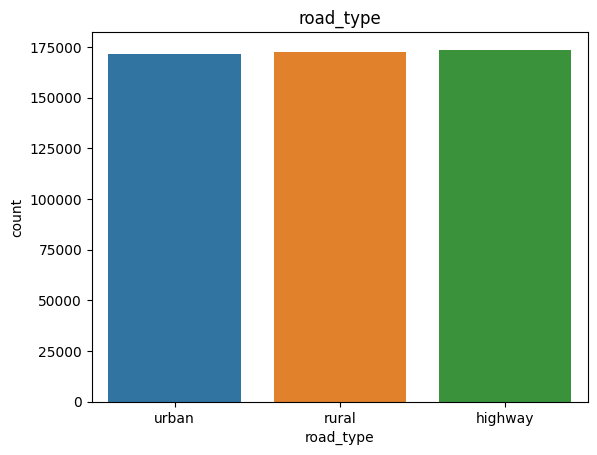

In [7]:
sns.countplot(x="road_type",data=train)
plt.title("road_type")
plt.show()

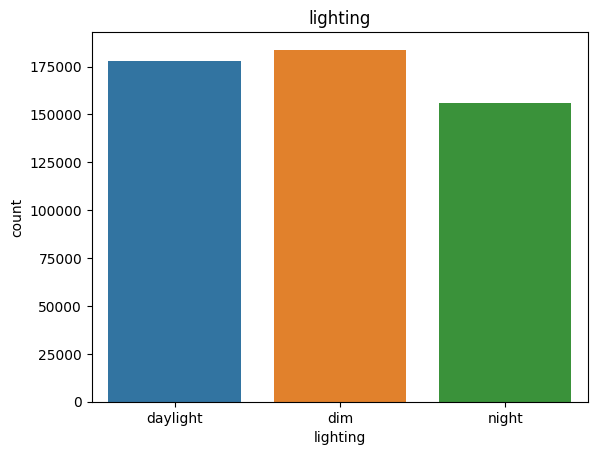

In [8]:
sns.countplot(x="lighting",data=train)
plt.title("lighting")
plt.show()

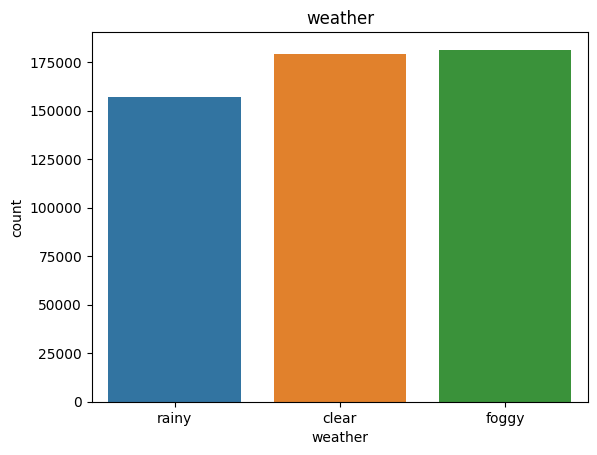

In [9]:
sns.countplot(x="weather",data=train)
plt.title("weather")
plt.show()

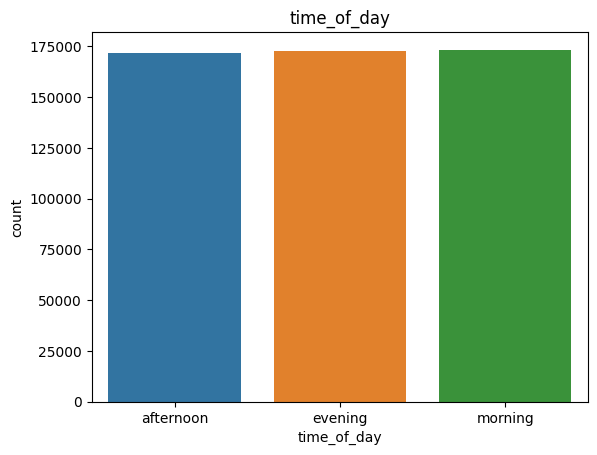

In [10]:
sns.countplot(x="time_of_day",data=train)
plt.title("time_of_day")
plt.show()

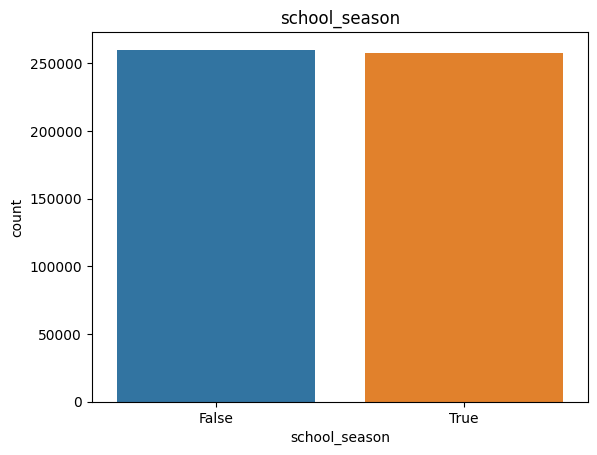

In [11]:
sns.countplot(x="school_season",data=train)
plt.title("school_season")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


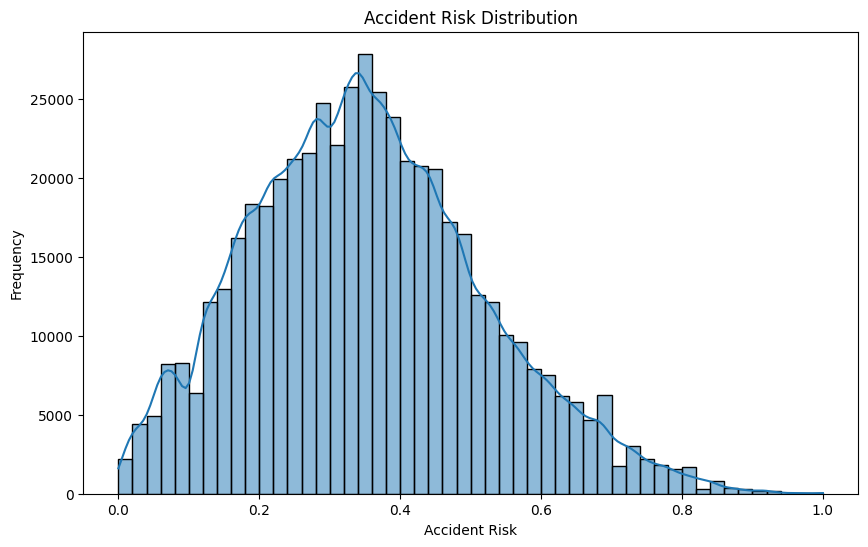

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(train['accident_risk'], bins=50, kde=True)
plt.title('Accident Risk Distribution')
plt.xlabel('Accident Risk')
plt.ylabel('Frequency')
plt.show()

# `Feature encoding`

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Label_encoder={}
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = le.fit_transform(train[col])
        test[col] = le.transform(test[col])
        Label_encoder[col]=le

# `Feature Importance`

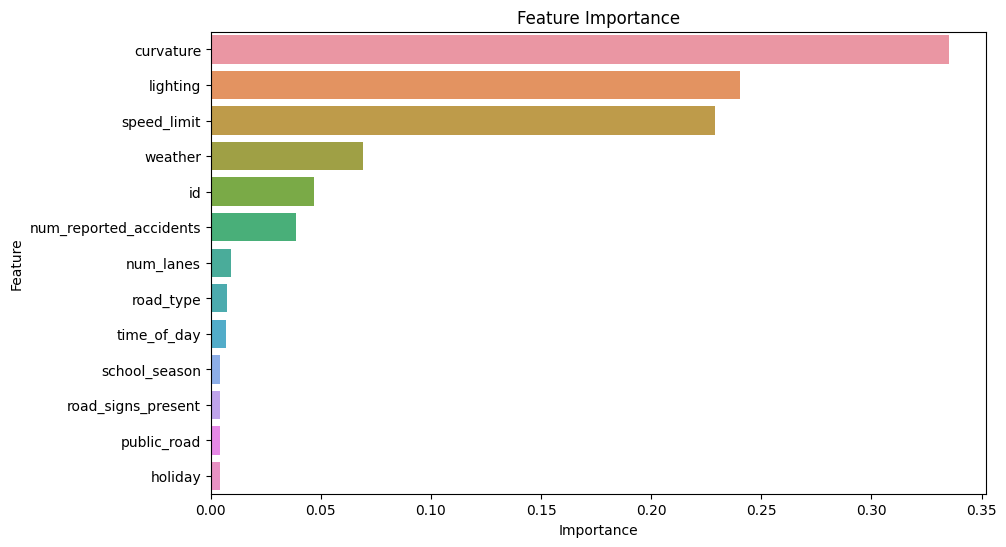

In [14]:
# Feature importance
from sklearn.ensemble import RandomForestRegressor
X = train.drop(columns=['accident_risk'])
y = train['accident_risk']
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [15]:
X = train.drop('accident_risk',axis=1)
y = train['accident_risk']

In [16]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# `Fit the model`

In [17]:
model = RandomForestRegressor(n_estimators=50)
model.fit(train_X, train_y)
predictions = model.predict(test_X)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
r2 = r2_score(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
mape = mean_absolute_percentage_error(test_y, predictions)
print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

R^2 Score: 0.8765470354908586
Mean Squared Error: 0.003408807238558778
Mean Absolute Error: 0.04530222788770751


# `Actual vs Predicted Accident Risk`

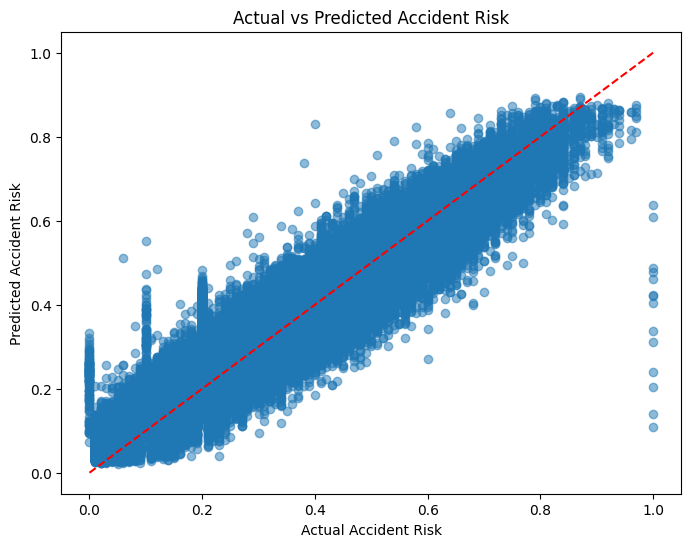

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, predictions, alpha=0.5)
plt.xlabel('Actual Accident Risk')
plt.ylabel('Predicted Accident Risk')
plt.title('Actual vs Predicted Accident Risk')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--')
plt.show()

In [20]:
submission=model.predict(test)
sample_submission=pd.DataFrame({
    "id":test["id"],
    "submission":submission
})

In [21]:
sample_submission.head()

,id,submission
0,517754,0.2820
1,517755,0.1060
2,517756,0.1840
3,517757,0.3132
4,517758,0.3840
